<a href="https://colab.research.google.com/github/Sam-Wadmare/ML-LAB/blob/main/lab/neural%20networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.9333


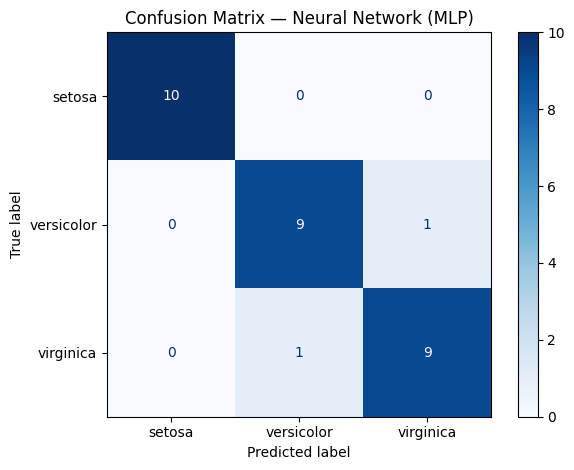

In [1]:
# exp13_neural_network_minimal.py
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Load dataset (multiclass)
data = load_iris(as_frame=True)
X = data.data
y = data.target
class_names = data.target_names

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# 4. Simple neural network (one hidden layer)
model = MLPClassifier(
    hidden_layer_sizes=(20,),   # 1 hidden layer with 20 neurons
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)
model.fit(X_train, y_train)

# 5. Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))

# 6. Simple visual — Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=class_names, cmap="Blues"
)
plt.title("Confusion Matrix — Neural Network (MLP)")
plt.tight_layout()
plt.show()
